In [42]:
import string
import csv
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

# Cleans csv files of actual twitter data: remove punctuation and stopwords (as defined by nltk)
def clean(name):
    
    file_in = name + '_picsremoved.csv'
    str = ''

    numrows = 0
    reader = csv.reader(open('Data/'+file_in))
    for row in reader:
        # replace http/https links with 'http'
        toAdd = re.sub(r'http\S+',r'http', row[6])
        # separate words accidentally attached to links but keep record of link
        toAdd, n = re.subn(r'\S+http',r'http.*', toAdd)
        for i in range(n):
            toAdd = toAdd + 'http'
        str = str + " " +(toAdd)
        numrows = numrows + 1
    
    sw = set(stopwords.words('english'))
    word_tokens = word_tokenize(str) 
  
    filtered = [w.lower() for w in word_tokens if w.lower() not in sw and w.isalpha()] 
            
    # return filtered list as string
    ret = (" ").join(filtered)
    return numrows, ret

In [43]:
from collections import defaultdict

# returns defaultdict of words and frequency
def word_count(words):
    counts = defaultdict(int)

    for word in words:
        counts[word] += 1

    return counts

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot
import numpy as np

# visualizations of word frequency: print top ten most frequent words, histogram of word counts, word cloud
# returns average words per tweet
def word_frequency(name, filetype, col):
    if filetype == "txt":
        numtweets, person = clean_txt(name.lower())
        name = re.sub('_.*','',name).capitalize()
    else:
        numtweets, person = clean(name.lower())
    
    words = person.split()
    avg_words_per_tweet = len(words) / numtweets
        
    d = word_count(words)
    
    # print top ten words
    topten = sorted(d.items(), key=lambda v: v[1], reverse=True)[:11]
    topten_keys = ['\"' + k[0] + '\"' for k in topten] 
    topten_values = [v[1] for v in topten] 
    plot.figure(figsize=(4,4)) 
    plot.barh(topten_keys, topten_values, color=col)
    plot.title(name, fontsize=14)
    plot.xlabel('Word Frequency')
    plot.xticks(rotation=45)
    plot.gca().invert_yaxis()
#     plot.savefig(name+'_freq.png',bbox_inches = "tight")
    plot.show()
    
    # histogram of word counts - decidec not to use
#     logbins = np.geomspace(min(d.values()), max(d.values()), 15)
#     plot.hist(d.values(), bins=logbins)
    
#     plot.ylabel('Number of Words')
#     plot.xscale('log')
#     plot.xlabel('Word Count');
#     plot.title(name + " Word Frequency")
#     plot.show() 

    p = re.sub('http','',person)
    p = re.sub('https','',p)

    # word cloud
    cloud = WordCloud(width = 500, height = 400, 
                      background_color ='white', 
                      min_font_size = 10, collocations=False).generate(p)
    plt.imshow(cloud) 
    plt.axis("off") 
    plt.title(name,fontsize=14)
#     plot.savefig(name+'_cloud.png')
    plt.show() 
    
    return avg_words_per_tweet

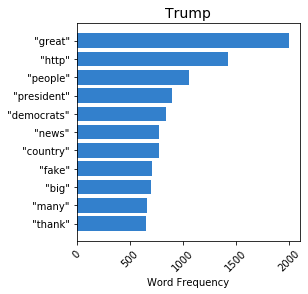

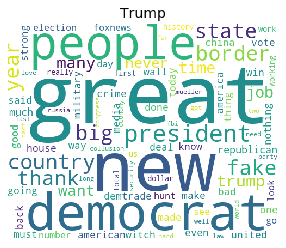

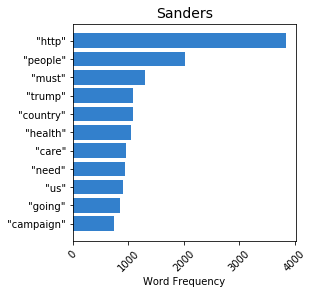

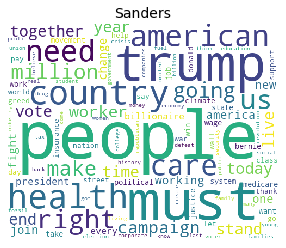

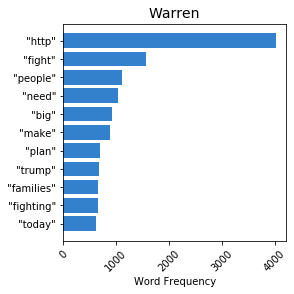

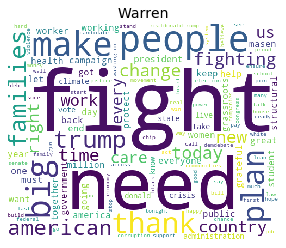

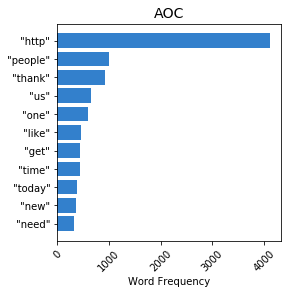

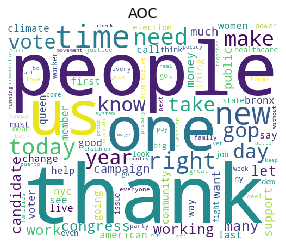

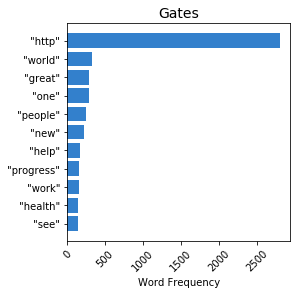

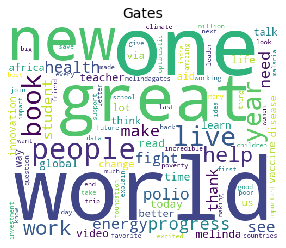

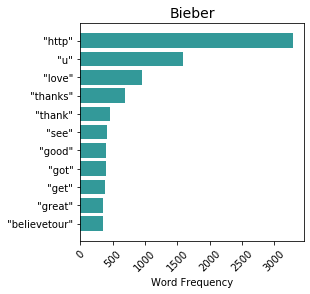

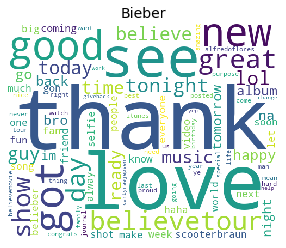

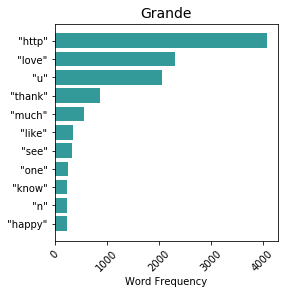

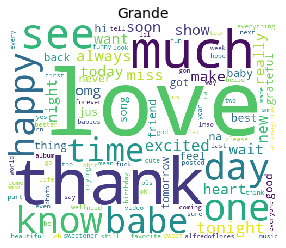

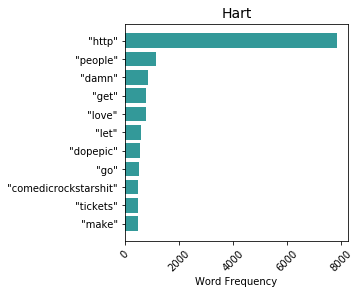

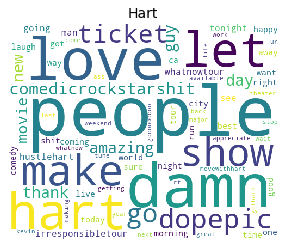

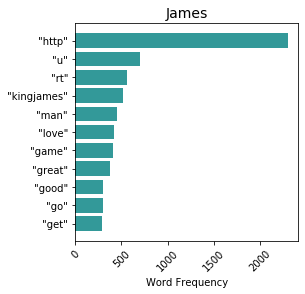

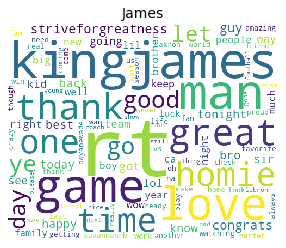

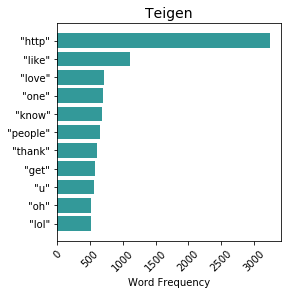

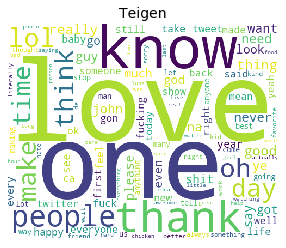

In [84]:
# Visualize word frequency for actual tweets
political = ['Trump','Sanders','Warren','AOC','Gates']
entertainers = ['Bieber','Grande','Hart','James','Teigen']
pol_wpt = []
ent_wpt = []
col1 = (0.2,0.5,0.8,1.0) # political figures
col2 = (0.2,0.6,0.6,1.0) # entertainers
for person in political:
    pol_wpt.append(word_frequency(person,'csv',col1))
for person in entertainers:
    ent_wpt.append(word_frequency(person,'csv',col2))

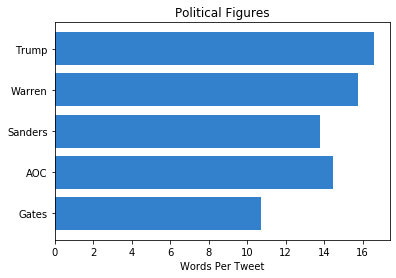

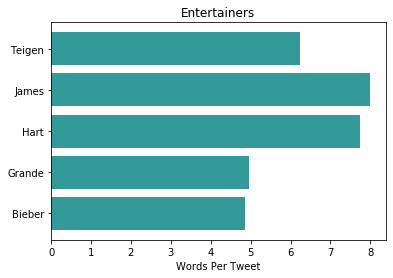

In [49]:
# Bar graph of average words per tweet for political figures
plot.barh(political, pol_wpt, color=col1)
plot.title('Political Figures',fontsize=12)
plot.xlabel('Words Per Tweet')
plot.gca().invert_yaxis()
# plot.savefig('pol_wpt.png')
plot.show()

# Bar graph of average words per tweet for entertainers
plot.barh(entertainers, ent_wpt, color=col2)
plot.title('Entertainers',fontsize=12)
plot.xlabel('Words Per Tweet')
# plot.savefig('ent_wpt.png')
plot.show()

In [85]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import os

# Sentiment analysis
def sentiment(name, sid_obj,col):
    
    file_in = name + '_picsremoved.csv'
    
    pos=[]
    neu=[]
    neg=[]
    cmp=[]

    reader = csv.reader(open('Data/'+file_in))
    for row in reader:
        text = row[6]
        sentiment = sid_obj.polarity_scores(text) 
        pos.append(sentiment['pos'])
        neu.append(sentiment['neu'])
        neg.append(sentiment['neg'])
        cmp.append(sentiment['compound'])
        
#     plot.hist(pos)
#     plot.hist(neu)
#     plot.hist(neg)
    plot.figure(figsize=(4,4)) 
    plot.xlabel('Compound Sentiment Score')
    plot.hist(cmp,color=col)
    plot.title(name,fontsize=14)
    
    avg = sum(cmp) / len(cmp)
    
#     plot.savefig(name+'_sent.png')
    plot.show()
    
    return avg

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sarahtam/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


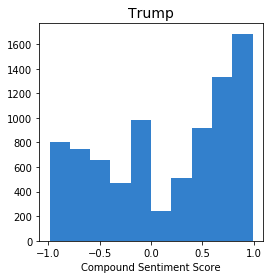

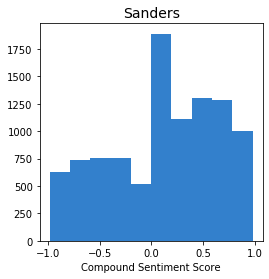

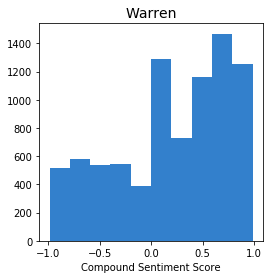

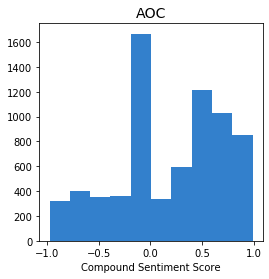

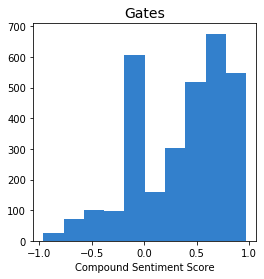

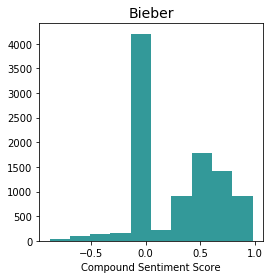

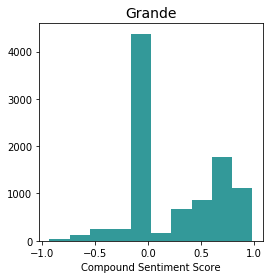

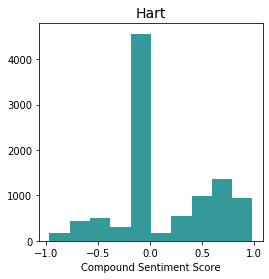

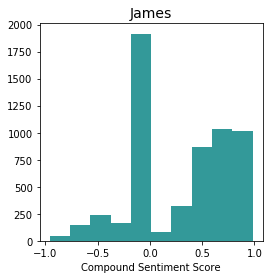

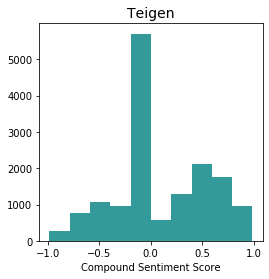

In [86]:
sid_obj = SentimentIntensityAnalyzer() 

pol_sent = []
ent_sent = []

for person in political:
    pol_sent.append(sentiment(person, sid_obj, col1))
for person in entertainers:
    ent_sent.append(sentiment(person, sid_obj, col2))

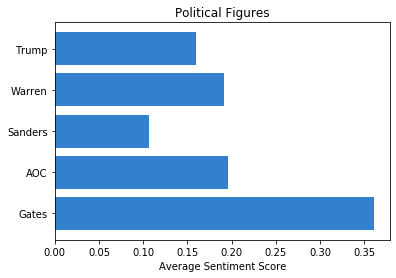

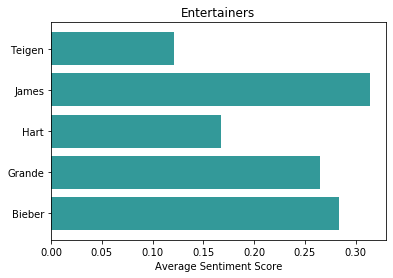

In [69]:
# Bar graph of average aggregate sentiment score for political figures
plot.barh(political, pol_sent, color=col1)
plot.title('Political Figures',fontsize=12)
plot.xlabel('Average Sentiment Score')
plot.gca().invert_yaxis()
plot.savefig('pol_sent.png')
plot.show()

# Bar graph of average aggregate sentiment score for entertainers
plot.barh(entertainers, ent_sent, color=col2)
plot.title('Entertainers',fontsize=12)
plot.xlabel('Average Sentiment Score')
plot.savefig('ent_sent.png')
plot.show()

In [87]:
# Cleans txt files of network-generated tweets: remove punctuation and stopwords (as defined by nltk)
def clean_txt(name):
    str = ''
    file_name = 'Generated tweets GPT-2/' + name
    f = open(file_name, "r") 
    numrows = 0
    
    for line in f:
        if line[0] != '=':
            # replace http/https links with 'http'
            toAdd = re.sub(r'http\S+',r'http', line)
            # separate words accidentally attached to links but keep record of link
            toAdd, n = re.subn(r'\S+http\S+',r'http.*', toAdd)
            for i in range(n):
                toAdd = toAdd + 'http'
            str = str + " " + toAdd
            numrows = numrows + 1

    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(str) 
    filtered = [w.lower() for w in word_tokens if not w.lower() in stop_words and w.isalpha()] 
    
    ret = (" ").join(filtered)
    return numrows, ret

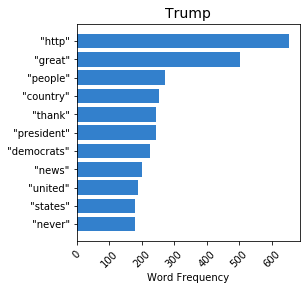

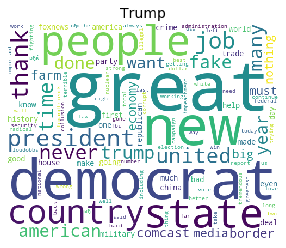

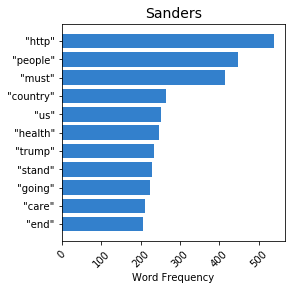

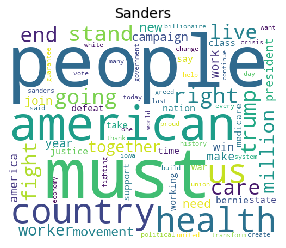

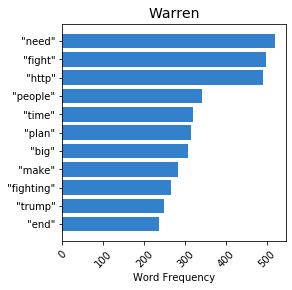

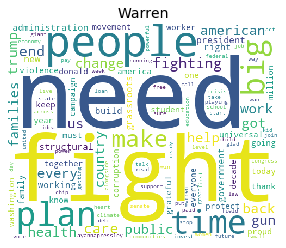

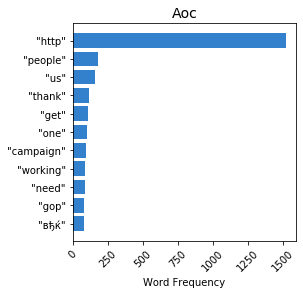

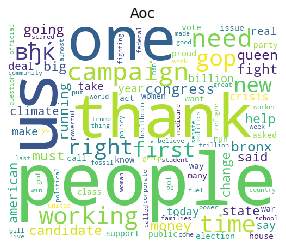

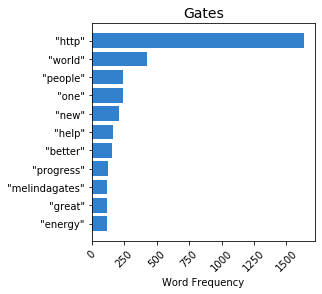

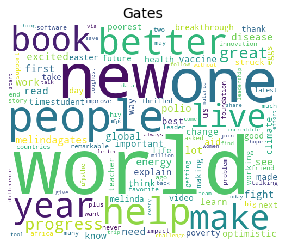

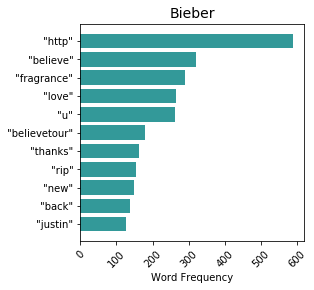

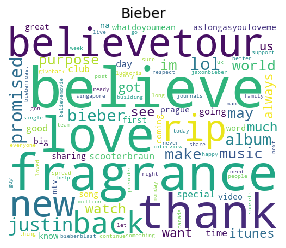

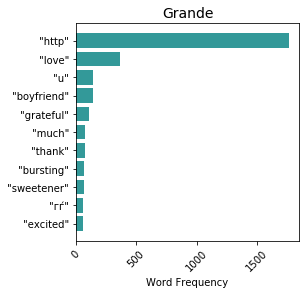

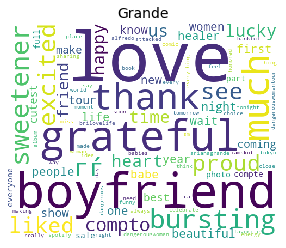

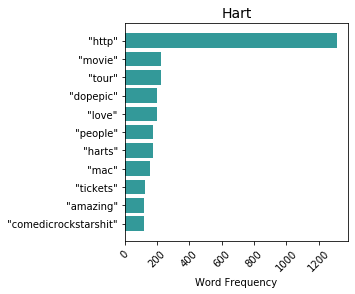

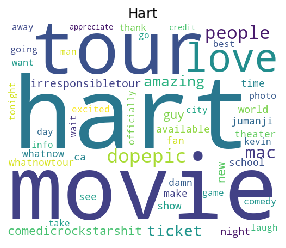

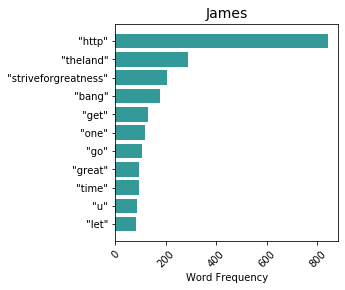

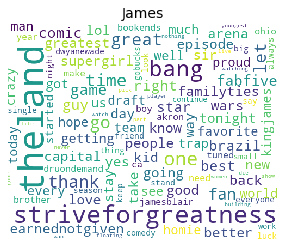

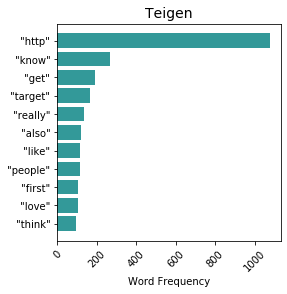

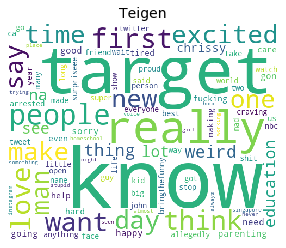

In [88]:
# Visualize word frequency for generated tweets

col1 = (0.2,0.5,0.8,1.0) # political figures
col2 = (0.2,0.6,0.6,1.0) # entertainers

pol_generated = ['trump_gpt2_gentext_20200422_114633.txt',
                 'sanders_gpt2_gentext_20200422_132841.txt', 
                 'warren_gpt2_gentext_20200423_195923.txt',
                 'aoc_gpt2_gentext_20200424_103305.txt',
                 'gates_gpt2_gentext_20200422_144757.txt']
ent_generated = ['bieber_gpt2_gentext_20200422_143655.txt',
                 'grande_gpt2_gentext_20200423_172156.txt',
                 'hart_gpt2_gentext_20200423_145030.txt',
                 'james_gpt2_gentext_20200424_130853.txt',
                 'teigen_gpt2_gentext_20200424_125356.txt']
polg_wpt = []
entg_wpt = []
for g in pol_generated:
    polg_wpt.append(word_frequency(g,'txt',col1))
for g in ent_generated:
    entg_wpt.append(word_frequency(g,'txt',col2))

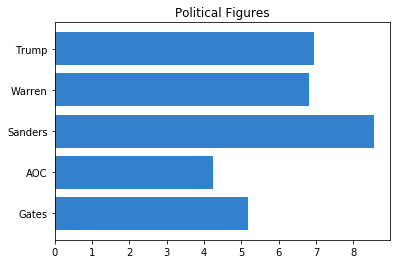

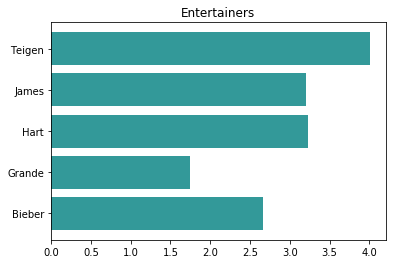

In [60]:
# Bar graph of average words per tweet for political figures
plot.barh(political, polg_wpt, color=col1)
plot.title('Political Figures',fontsize=12)
plot.gca().invert_yaxis()
# plot.savefig('pol_wpt.png')
plot.show()

# Bar graph of average words per tweet for entertainers
plot.barh(entertainers, entg_wpt, color=col2)
plot.title('Entertainers',fontsize=12)
# plot.savefig('ent_wpt.png')
plot.show()

In [89]:
def sentiment_txt(name, sid_obj, col):
#     remove punctuation and stopwords (as defined by nltk)
    
    pos=[]
    neu=[]
    neg=[]
    cmp=[]

    file_name = 'Generated tweets GPT-2/' + name
    f = open(file_name, "r") 
    
    for text in f:
        sentiment = sid_obj.polarity_scores(text) 
        pos.append(sentiment['pos'])
        neu.append(sentiment['neu'])
        neg.append(sentiment['neg'])
        cmp.append(sentiment['compound'])
        
    name = re.sub('_.*','',name).capitalize()
    avg = sum(cmp) / len(cmp)
        
#     plot.hist(pos)
#     plot.hist(neu)
#     plot.hist(neg)
    plot.figure(figsize=(4,4)) 
    plot.hist(cmp,color=col)
    plot.xlabel('Compound Sentiment Score')
    plot.title(name,fontsize=14)
    
#     plot.savefig(name+'_gsent.png')
    plot.show()
    
    return avg

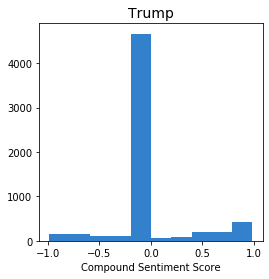

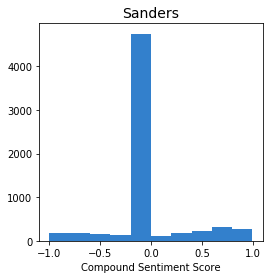

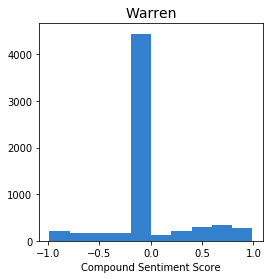

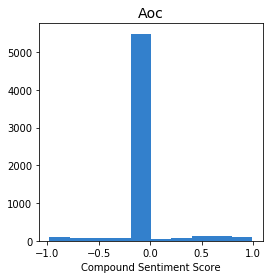

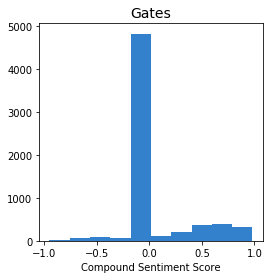

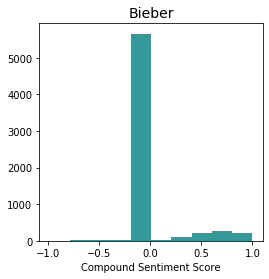

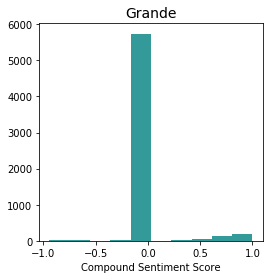

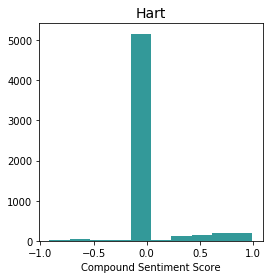

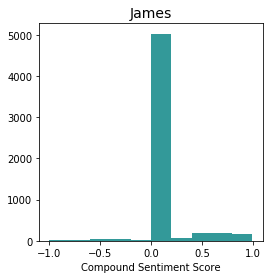

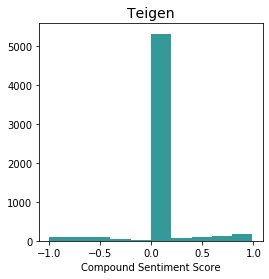

In [90]:
sid_obj = SentimentIntensityAnalyzer() 

pol_gsent = []
ent_gsent = []

for g in pol_generated:
    pol_gsent.append(sentiment_txt(g, sid_obj, col1))
for g in ent_generated:
    ent_gsent.append(sentiment_txt(g, sid_obj, col2))

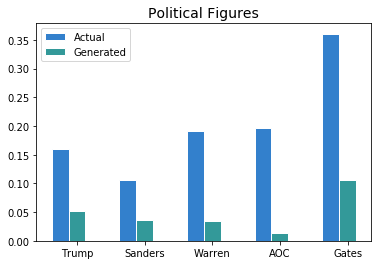

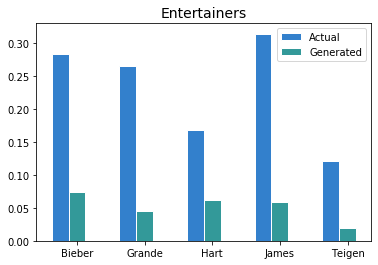

In [93]:
#Bar graph comparing sentiment of actual tweets to generated tweets

# Political figures
barWidth = 0.25
bars1 = pol_sent
bars2 = pol_gsent

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plot.bar(r1, bars1, color=col1, width=barWidth, edgecolor='white', label='Actual')
plot.bar(r2, bars2, color=col2, width=barWidth, edgecolor='white', label='Generated')

plot.title('Political Figures', fontsize=14)
plot.xticks([r + barWidth for r in range(len(bars1))], political)

plot.legend()
plot.savefig('political_sentiment.png')
plot.show()

# Entertainers
barWidth = 0.25
bars1 = ent_sent
bars2 = ent_gsent

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plot.bar(r1, bars1, color=col1, width=barWidth, edgecolor='white', label='Actual')
plot.bar(r2, bars2, color=col2, width=barWidth, edgecolor='white', label='Generated')

plot.title('Entertainers',fontsize=14)
plot.xticks([r + barWidth for r in range(len(bars1))], entertainers)

plot.legend()
plot.savefig('entertainer_sentiment.png')
plot.show()